**Binary Classification: Detect diabetes using Neural Network**

In [220]:
### importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from keras import regularizers
import random
import os

In [221]:
### random seed for reproducibility

seed_value = 6
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

In [222]:
# Regulizer coefficient
lamb = 0.001

# flag for L2/Dropout regularization selection(L2 = 0, Dropout = 1)
flag = 1

In [223]:
### importing a shuffled csv file

diabetes = pd.read_csv(r'/content/diabetes.csv').sample(frac=1).reset_index(drop=True)

In [224]:
# Make a copy of dataframe
df = diabetes.copy()

# Display top 3 rows and size of dataset
display(df.head(3))
print('\nSize of the dataset: ', len(df))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,104,76,0,0,18.4,0.582,27,0
1,6,119,50,22,176,27.1,1.318,33,1
2,2,122,70,27,0,36.8,0.340,27,0



Size of the dataset:  768


In [225]:
# scaling data
df = (df-df.mean(axis='index'))/(df.max()-df.min())
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.226180,-0.084897,0.056513,-0.207439,-0.094326,-0.202572,0.047021,-0.104015,-0.348958
1,0.126762,-0.009520,-0.156602,0.014783,0.113712,-0.072915,0.361283,-0.004015,0.651042
2,-0.108532,0.005555,0.007332,0.065288,-0.094326,0.071646,-0.056309,-0.104015,-0.348958


In [226]:
# resetting actual outcome to original values after scaling: See the "outcome" Column changed back to original values [0, 1].
df['Outcome'] = diabetes['Outcome'].copy()
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.226180,-0.084897,0.056513,-0.207439,-0.094326,-0.202572,0.047021,-0.104015,0
1,0.126762,-0.009520,-0.156602,0.014783,0.113712,-0.072915,0.361283,-0.004015,1
2,-0.108532,0.005555,0.007332,0.065288,-0.094326,0.071646,-0.056309,-0.104015,0


In [227]:
### Splitting the dataset into train/validate/test at 60:20:20 ratio

train_df, temp_df = train_test_split( df, test_size=0.4, random_state=seed_value)
val_df, test_df = train_test_split( temp_df, test_size=0.5, random_state=seed_value)

In [228]:
### Separate the dataset into features variable (x_) and target variable (y_)

y_train = train_df['Outcome'].copy()
x_train = train_df.iloc[:,:8]

y_val = val_df['Outcome'].copy()
x_val = val_df.iloc[:,:8]

y_test = test_df['Outcome'].copy()
x_test = test_df.iloc[:,:8]

### Neural Network Model Initialization

In [229]:
### Neural Network Model initialization using L2 regulizer.

if flag == 0:
    model = keras.Sequential([
        keras.layers.Dense(100, kernel_regularizer=regularizers.l2(lamb), activation=tf.nn.relu),
        keras.layers.Dense(500, kernel_regularizer=regularizers.l2(lamb), activation=tf.nn.relu),
        keras.layers.Dense(500, kernel_regularizer=regularizers.l2(lamb), activation=tf.nn.relu),
        keras.layers.Dense(1, kernel_regularizer=regularizers.l2(lamb), activation=tf.nn.sigmoid),
    ])


In [230]:
### Neural Network Model initialization using Dropout regulizer.

if flag == 1:
  model = keras.Sequential([
          keras.layers.Dropout(0.2, input_shape=(8,)),
          keras.layers.Dense(100, activation=tf.nn.relu),
          keras.layers.Dense(500, activation=tf.nn.relu),
          keras.layers.Dense(500, activation=tf.nn.relu),
          keras.layers.Dense(1, activation=tf.nn.sigmoid),
      ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training of the model

In [231]:
### Training of the model

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_val, y_val), verbose=0)

In [232]:
### Printing Loss and Accuracy of the model for training and validation data

print('Train_loss: ', history.history['loss'][-1]*100)
print('Train_accuracy: ', history.history['accuracy'][-1]*100)
print('\nVal_loss: ', history.history['val_loss'][-1]*100)
print('Val_accuracy: ', history.history['val_accuracy'][-1]*100)

### Model performance on test dataset

test_res = model.evaluate(x_test, y_test, verbose=0)
print('\nTest_loss: ', test_res[0]*100)
print('Test_accuracy: ', test_res[1]*100)


Train_loss:  51.69830918312073
Train_accuracy:  74.56521987915039

Val_loss:  49.73157346248627
Val_accuracy:  76.6233742237091

Test_loss:  40.77745974063873
Test_accuracy:  81.81818127632141


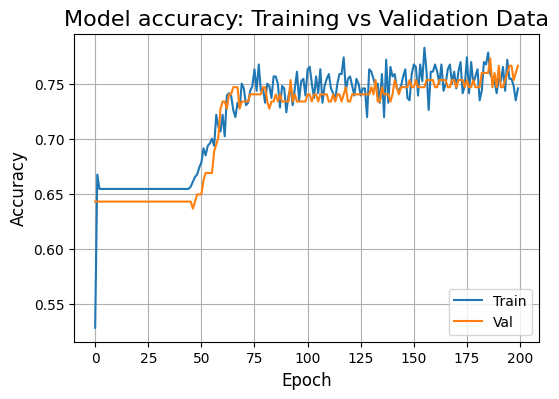

In [233]:
### Plot of Accuracy: Training vs Validation data

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy: Training vs Validation Data', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='lower right')
plt.grid()
plt.show()

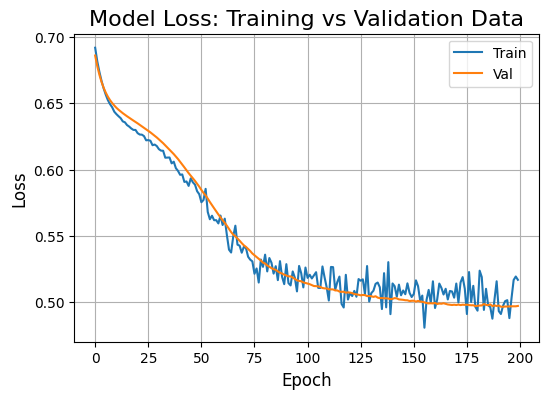

In [234]:
### Plot of Loss: Training vs Validation data

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: Training vs Validation Data', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper right')
plt.grid()
plt.show()

Confusion Matrix Plot

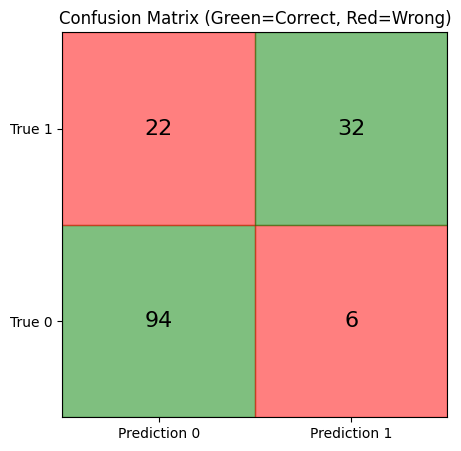

In [235]:
# Predictions
predictions = (model.predict(x_test, verbose=0) > 0.5).astype("int32")

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(5,5))

# Ignore warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0=all, 1=info, 2=warning, 3=error
tf.get_logger().setLevel('ERROR')

# Plot the grid
for i in range(2):
    for j in range(2):
        # Green for correct (TP/TN), Red for wrong (FP/FN)
        if i == j:
            color = 'green'
        else:
            color = 'red'
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color, alpha=0.5))

        # Add text (confusion matrix value)
        ax.text(j + 0.5, i + 0.5, conf_mat[i,j],
                ha='center', va='center', fontsize=16, color='black')

# Set labels
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Prediction 0', 'Prediction 1'])
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(['True 0', 'True 1'])

# Set limits and grid
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_aspect('equal')
ax.grid(False)

plt.title('Confusion Matrix (Green=Correct, Red=Wrong)')
plt.show()


In [236]:
# ### Plot of Confusion matrix

# predictions = (model.predict(x_test, verbose=0) > 0.5).astype("int32")
# clf = SVC(random_state=0)
# clf.fit(x_test, y_test)
# conf_mat = (confusion_matrix(y_test,predictions))
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
# disp.plot()
# plt.title('Confusion matrix')
# plt.show()

## ------------------------------------------- END ----------------------------------------------